<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/10_%EC%97%AD%EC%A0%84%ED%8C%8C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 계층( Layer )
* 국소적 계산
  * 내가 관심있는 연산만 신경을 쓰는 것
  * **계층**별로 국소적 계산이 일어난다라고 생각하면 된다.
  * 하나의 계층은 하나의 일만(국소적) 전문적으로 할 수 있어야 합니다.
    * 예를 들어 ReLU 계층을 만들었으면, ReLU에 대한 순전파(forward), 역전파(backward)만 신경 쓰자

## 레이어 구현의 주안점
* 순전파와, 역전파를 어떻게 구현할지에 대한 계획
  1. 논문을 보고 구축하는 경우
    * 논문에 나와있는 순전파(with 역전파) 수식을 연구
    * 수식을 효율적, 간편하게 짤 수 있는지에 대한 연구
      * 석, 박사급은 이러한 수식을 연구하고, 만드는 것
      * 우리는 이것들을 구현을 해야 한다.(컴퓨터 시스템에 맞게)
  2. 스스로 비즈니스를 만들어서 하는 경우
    * 비즈니스에 맞게 레이어를 짠다는 이야기는 비즈니스에 맞는 수식을 개발한다.
      * 추가적으로 기존 레이어나 알고리즘들을 커스터마이징 하거나 조합하는 등의 범위도 포함
    * 수식을 세우고 계속 테스트를 해봐야 한다.
      * 수식이 컴퓨터에 효율적인지를 테스트 해본다. - Overflow, Underflow 등 컴퓨터에 맞는 수식을 세웠는지에 대한 검증이 필요

# 1. 곱셈 계층 구현하기
입력이 `x, y`일 때
* `forward`(순전파) : `x * y`
* `backward`(역전파) : `dx = 미분값 * y`, `dy = 미분값 * x`
* 비고 : forward할 때 들어왔던 값들을 저장하고 있어야 한다.

In [ ]:
class MulLayer:
  
  # 딥러닝 레이어의 초기화(생성자에서)는 레이어에서 사용할 옵션이나 변수를 미리 준비
  def __init__(self):
    self.x = None
    self.y = None
  
  # 곱셈레이어의 순전파에서 역전파에 필요한 변수를 저장.
  def forward(self, x, y):
    self.x = x
    self.y = y

    out = x * y
    return out
  
  # forward 할때 저장해 놓았든 x, y를 각각 반대 방향으로 미분값과 곱해서 리턴
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x

    return dx, dy

곱셈 레이어 테스트 하기

In [ ]:
# 순전파
apple = 100   # 사과 1개당 가격
apple_cnt = 2 # 사과 개수
tax = 1.1     # 소비세

# 계층은 2개
# (apple * apple_cnt) * tax

mul_apple_layer = MulLayer()
mul_tax_layer   = MulLayer()

# 순전파 수행
# 순서가 굉장히 중요합니다!!!!!
# 계획한 순서 그대로 레이어를 배치해서 연산을 해야 한다.
# 순서가 맞지 않으면 역전파 할 때 문제가 된다.

# 순전파 시에 A-B-C 순으로 계산을 했다면
# 역전파 시에는 C-B-A 순으로 역전파가 되어야 한다.

apple_price = mul_apple_layer.forward(apple, apple_cnt)
price       = mul_tax_layer.forward(apple_price, tax)

print("최종 사과의 가격 : {:.0f}".format(price))

최종 사과의 가격 : 220


In [ ]:
# 역전파 수행하기
# 제일 마지막 값에 대한 미분값 생각하기
# d돈통 / d포스기 = 1
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)

print("사과 전체 가격(사과 1개 가격 * 사과 개수)의 미분값 : {}".format(dapple_price))
print("사과 1개 가격에 대한 미분값 : {}".format(dapple))
print("사과 개수에 대한 미분값 : {}".format(dapple_cnt))
print("소비세에 대한 미분값 : {}".format(dtax))

사과 전체 가격(사과 1개 가격 * 사과 개수)의 미분값 : 1.1
사과 1개 가격에 대한 미분값 : 2.2
사과 개수에 대한 미분값 : 110.00000000000001
소비세에 대한 미분값 : 200


# 2. 덧셈 계층 구현하기
* `forward` : `x + y`
* `backward` : 뒷층에서 보내진 미분값 * 1만 하면 된다.( `dout * 1` )
* 비고 : 곱셈계층과는 다르게 `forward`시에 입력된 값을 가지고 있지 않아도 된다. 역전파 시에는 들어온 미분값만 리턴하면 되니까

In [ ]:
class AddLayer:

  def __init__(self):
    # 할 거 없다.
    pass
  
  def forward(self, x, y):
    out = x + y
    return out
  
  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1

    return dx, dy

In [ ]:
# 사과와 오렌지를 장을 볼게요
apple = 100
apple_cnt = 2

orange = 150
orange_cnt = 3

tax = 1.1

In [ ]:
# 1 계층( 사과 1개 * 사과 가격, 오렌지1 * 오렌지 가격)
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()

# 2 계층 ( 사과 전체 가격 + 오렌지 전체 가격 )
add_apple_orange = AddLayer()

# 3 계층 ( 소비세 곱하기 )
mul_tax_layer = MulLayer()

In [ ]:
# 1 계층 연산
apple_price = mul_apple_layer.forward(apple, apple_cnt)
orange_price = mul_orange_layer.forward(orange, orange_cnt)

# 2 계층 연산
total_price = add_apple_orange.forward(apple_price, orange_price)

# 3 계층 연산( 소비세 연산 )
price = mul_tax_layer.forward(total_price, tax)

print("최종 가격 : {}".format(price))

최종 가격 : 715.0000000000001


In [ ]:
# 역전파
dprice = 1 # d돈통 / d포스기

# dprice / dtotal_price, dprice / tax -> ( d포스기 / d전체 가격), (d포스기 / d소비세)
dtotal_price, dtax = mul_tax_layer.backward(dprice)

# d돈통 / dapple_price = ( d돈통 / d포스기 ) * ( d포스기 / dtotal_price ) * ( dtotal_price / dapple_price )
dapple_price, dorange_price = add_apple_orange.backward(dtotal_price)

# 사과와 오렌지에 대한 각각의 미분값 구하기
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)
dorange, dorange_cnt = mul_orange_layer.backward(dorange_price)

In [ ]:
print("사과 개수에 대한 돈통의 미분값(d돈통/d사과개수) : {}".format(dapple_cnt))
print("사과 1개 가격에 대한 돈통의 미분값 (d돈통/d사과1개가격) : {}".format(dapple))

print("오렌지 개수에 대한 돈통의 미분값(d돈통/d오렌지개수) : {}".format(dorange_cnt))
print("오렌지 1개 가격에 대한 돈통의 미분값 (d돈통/d오렌지1개가격) : {}".format(dorange))

print("소비세에 대한 돈통의 미분값 (d돈통/d소비세) : {}".format(dtax))

사과 개수에 대한 돈통의 미분값(d돈통/d사과개수) : 110.00000000000001
사과 1개 가격에 대한 돈통의 미분값 (d돈통/d사과1개가격) : 2.2
오렌지 개수에 대한 돈통의 미분값(d돈통/d오렌지개수) : 165.0
오렌지 1개 가격에 대한 돈통의 미분값 (d돈통/d오렌지1개가격) : 3.3000000000000003
소비세에 대한 돈통의 미분값 (d돈통/d소비세) : 650


# 신경망 레이어 만들기
* ReLU 레이어
* Sigmoid 레이어
* Affine 레이어
  * 행렬 내적 연산
  * Affine 변환 : 기하학에서 행렬 내적에 의해 모양이 바뀌는 변환
  * Dense(밀집) 또는 Fully Connected Layer(FCL, 완전 연결 계층)
* Softmax + Loss 레이어

## ReLU 구현
* `forward` : 입력값이 0보다 작으면 0으로, 0보다 크면 입력값을 그대로 출력함
* `backward` : `forward`시에 0보다 작았으면 해당 위치(인덱스) 값을 0으로 설정( 미분값 0을 곱하니까), 0보다 컸으면 변화율(미분값)이 1이기 때문에 미분값을 그대로 유지( 곱하기 1 )
* 비고 : 레이어에서 가지고 있어야 할 값 : forward 시에 어떠한 인덱스의 값이 음수였는지를 저장

In [ ]:
class ReLU:
  def __init__(self):
    # mask : 순전파 시에 음수였던 인덱스를 저장하기 위함( 음수 : True, 양수 : False )
    self.mask = None
  
  def forward(self, x):
    self.mask = (x <= 0) # 음수면 True, 양수면 False
    
    out = x.copy() # 원본 배열 복사(백업)
    out[self.mask] = 0 # 음수인 부분을 0으로 만들어 준다.

    return out
  
  def backward(self, dout):
    # 순전파 때 음수였던 위치를 0으로 만들었다.
    # 음수였었던 인덱스를 기억하고 있다가(self.mask) 미분값 전달시에 해당 인덱스를 0으로 만든다.
    dout[self.mask] = 0
    dx = dout 

    return dx

In [ ]:
import numpy as np

x = np.array([[1.0, -0.5],
              [-2.0, 3.0]])

print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [ ]:
relu = ReLU()
relu.forward(x)

array([[1., 0.],
       [0., 3.]])

In [ ]:
relu.mask

array([[False,  True],
       [ True, False]])

In [ ]:
dx = np.array([[-0.1, 3.0],
               [1.3, -1.8]])

relu.backward(dx)

array([[-0.1,  0. ],
       [ 0. , -1.8]])

## 시그모이드 구현
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$
$$
y = \sigma(x)
$$
$$
\frac{\partial y}{\partial x} = y(1-y)
$$

* 시그모이드 레이어에서 순전파 때 기억하고 있어야 할 값 : $y$값만 알고 있으면 된다.

In [ ]:
class Sigmoid:

  def __init__(self):
    # y를 out이라고 하자
    self.out = None
  
  def forward(self, x):
    out = 1 / ( 1 + np.exp(-x) )
    self.out = out # 시그모이드 결과 저장

    return out

  def backward(self, dout):
    dx = dout * self.out * (1 - self.out) # 미분값 dout을 곱하는 이유? 합성함수 미분 공식을 생각해 보세요
    return dx

## Affine 계층
* `forward` 
  1. 입력값 `x`와 가중치 `W`의 내적 + `b`
  2. 평탄화
    * 1차원 배열로 데이터가 들어왔을 경우 대응
    * 다차원 배열( 텐서 )에 대한 대응
    * 원본 데이터의 형상을 저장
* `backward`
  1. 미분값과 가중치의 전치행렬 내적 ( 입력값에 대한 미분값 )
  2. 입력값의 전치행렬과 미분값 내적 ( 가중치에 대한 미분값 )
  3. 배치 만큼의 편향 합 구하기
  4. 미분값의 형상을 원본 x의 형상으로 다시 바꿔주기

forward에 의해서 형상(shape)의 변환이 일어나기 때문에, backward 할 때 원본 모양으로 되돌려 준다. 예를 들어

`(100, 28, 28)`가 들어왔을 때, 평탄화에 의해 `(100, 784)`가 된다. 모양이 바뀌었기 때문에 다차원 배열에도 모두 대응하기 위해 원본 형상인 `(100, 28, 28)`을 저장해 놨다가 역전파 할 때 저장했던 원본 모양으로 미분값 배열의 형상을 되돌려 준다.

저장해야할 값
* 가중치, 편향
* 입력값 `x`
* 원본 x의 형상(shape) 
* 미분값도 저장해야 한다.
  * 미분값을 알고 있어야 나중에 최적화(Optimization)를 할 수 있다.
  * 경사하강법을 진행해야 하기 때문

In [ ]:
class Affine:
  def __init__(self, W, b):
    # 1. 가중치, 편향, 입력값 x
    self.W = W
    self.b = b

    self.x = None

    # x에 대한 역전파를 수행할 때 모양이 바뀌 버린 x의 형상을 원래대로 돌려 놓기 위해 원본 x의 형상을 저장할 변수
    # x의 미분값의 형상은 x와 똑같아야 한다.
    # 원본 x가(100, 784) -> x의 미분값도(100, 784)
    self.original_x_shape = None

    # 최적화(Optimization)를 이해 각 매개변수의 미분값을 가지고 있어야 한다.
    # 추후에 경사하강법 등을 구현하기 위해 사용
    # dW, db를 사용해서 W와 b를 갱신(update)하는 것이 << 학습 >>
    self.dW = None
    self.db = None

  def forward(self, x):
    # 텐서 대응 ( 배치마다의 데이터 개수를 따로따로 평평하게 줄을 세운다. )
    #  ex) (3, 2, 2) -> 3개의 데이터가 (2,2) 모양으로 들어있는 모양세(N, x1, x2) -> (3, 4) -> 역전파 할 때 (3, 2, 2)
    #  ex) (3, 2, 2, 2) -> 평탄화 -> (3, 8) -> 역전파 -> (3, 2, 2, 2)
    self.original_x_shape = x.shape

    # 평탄화 진행
    DATA_SIZE = x.shape[0] # 배치 사이즈 가져오기
    x = x.reshape(DATA_SIZE, -1)

    self.x = x # 역전파 때 가중치에 곱하기 위해 저장

    out = np.dot(self.x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)

    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    # 미분값(dx)을 입력값 x의 형상으로 다시 바꿔주기
    dx = dx.reshape(*self.original_x_shape) # (12, 3) -> *(12, 3) -> 12, 3으로 언패킹 된다. *을 붙이면 튜플이 순서대로 언패킹 된다.
    return dx


## SoftmaxWithLoss 계층(출력층)
* softmax에 의한 분류 및 CEE를 활용한 손실함수를 동시에 구현
* 순전파 시에는 softmax를 적용하고, loss를 적용
  * 정답 레이블(t)
  * 예측 레이블( 소프트맥스 결과물 )
  * loss값 ( 결과 기록을 위해 )
* 역전파 시에는 오차($y-t$)를 구해서 이전층에 전달해 주면 된다.

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None # 손실값(시각화 할 때 쓴다.)
    self.y    = None # 예측값
    self.t    = None # 정답 레이블
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss
  
  def backward(self, dout=1): # dout이 1인 이유 : d돈통 / d포스기
    # 배치 고려하기
    batch_size = self.t.shape[0]

    # t가 원-핫 인코딩이 되어있는지, 안되어 있는지 고려
    if self.t.size == self.y.size: # 출력층의 원소 개수를 비교하는 것은 원-핫 인코딩이 되어있는 t
      dx = (self.y - self.t) / batch_size # 배치의 오차 평균
    else: # t가 원-핫 인코딩이 되어있지 않은 경우
      dx = self.y.copy()

      # 원-핫 인코딩이 되어있지 않은 t는 정답레이블의 인덱스로 생각할 수 있다.
      # y = [0.2, 0.1, 0.7], t = 2
      # dx[np.arange(batch_size), self.t] -> dx[0, 2] -> 0.7 -> 0.7 - 1를 구하겠다는 이야기 이다. -> -0.3의 오차가 있다.
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size
    
    return dx

# 네트워크 생성 및 조립
* 레이어마다 이름을 붙여주고, 레이어의 추가 순서를 **항상 유지**
* 원래는 딕셔너리를 활용했었죠(`parmas`). 그런데 일반 딕셔너리는 데이터 추가 순서를 유지하지 않죠
* 키값(레이어 이름)도 활용하면서 동시에 레이어 추가 순서도 유지할 수 있는 `OrderedDict`를 활용할거에요

In [ ]:
%cd /content/drive/MyDrive/클라우드2차/딥러닝/참고자료

/content/drive/MyDrive/클라우드2차/딥러닝/참고자료


In [ ]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient # 수치미분을 활용한 기울기 배열을 구하는 함수( 예전에 이 방식으로 했다가 너무 느려서 GG )
from collections import OrderedDict

In [ ]:
class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 매개변수 초기화
    self.params = {}

    # 1층 은닉층을 위한 매개변수
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["b1"] = np.zeros(hidden_size)

    # 2층 출력층
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params["b2"] = np.zeros(output_size)

    # 레이어 만들기
    # 추가되는 레이어의 순서가 바뀌면 안되기 때문에 OrderedDict를 활용
    self.layers = OrderedDict()

    # Affine 1층 (은닉 레이어 - Fully Connected )
    self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
    self.layers["ReLU"] = ReLU()

    # Affine 2층 (출력 레이어)
    self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])

    # 항상 마지막은 SoftmaxWithLoss가 되어야 한다. 
    self.lastLayer = SoftmaxWithLoss()

  
  def predict(self, x):
    # 순전파
    # self.layers에 들어있는 모든 레이어를 순서대로 꺼내서 forward 시키면 된다.

    for layer in self.layers.values():
      x = layer.forward(x)

    # softmax는 단조함수니까 딱히 지금은 필요 없을듯..?    
    return x

  
  def loss(self, x, t):
    # predict를 하고, predict에 대한 loss를 구하면 된다.
    y = self.predict(x)

    return self.lastLayer.forward(y, t)
  
  def accuracy(self, x, t):
    # 예측을 하고, 정답이랑 얼마나 틀렸는지를 계산
    # 단, t가 원-핫 인코딩이 되어있는지, 안되어있는지가 중요!
    y = self.predict(x)
    y = np.argmax(y, axis=1) # 제일 큰 값 하나만 뽑자.( 제일 확률이 높은 곳에 위치한 인덱스를 갖는다. )

    # 원-핫 인코딩 처리
    # t.ndim != 1 --> t가 원핫 인코딩이 되어있는 상태라면
    # t에서 제일 높은 인덱스를 찾겠다.
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])

    return accuracy
  
  # 역전파를 활용한 기울기 배열 구하기
  def gradient(self, x, t):
    # 역전파를 하기 위해 필요한 것
    #  1. 오차를 먼저 구해야 한다.
    #   오차를 구하려면? 예측(predict)을 해서 loss를 계산해야 오차를 구할 수 있다.
    self.loss(x, t)

    # 역전파
    dout = 1 # dL/dL --> d돈통 / d포스기

    # SoftmaxWithLoss의 오차에 대한 미분값을 구해오자
    dout = self.lastLayer.backward(dout) # 순수한 오차가 나온다 (y - t)

    layers = list(self.layers.values()) # 레이어를 모두 가지고 와서
    layers.reverse() # 순서 뒤집기

    # 순서가 뒤집어진 레이어를 하나씩 꺼내서
    for layer in layers:
      dout = layer.backward(dout)
    
    # 구해진 미분값(기울기)을 저장
    grads = {}
    grads["W1"], grads["b1"] = self.layers["Affine1"].dW, self.layers["Affine1"].db
    grads["W2"], grads["b2"] = self.layers["Affine2"].dW, self.layers["Affine2"].db

    return grads


  # 구식. 수치미분을 활용해서 기울기를 구하기( 사용하지 않습니다. 왜? 느리니까... )
  def numerical_gradient_params(self, x, t):
    loss_W = lambda W: self.loss(x, t)
        
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
    return grads



수치 미분과 오차역전파를 했을 때의 기울기 비교

In [ ]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import OneHotEncoder

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

# feature 전처리
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0 # 이미지 정규화 기법. 255.0 으로 나눠주면 모든 픽셀 데이터가 0 ~ 1사이의 값을 갖게 되고, 훈련이 쉽게 된다.

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train_dummy.shape, y_test_dummy.shape

((60000, 10), (10000, 10))

In [ ]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

X_batch = X_train[:3]
t_batch = y_train[:3]

# 수치미분을 활용한 기울기 배열
grad_numerical = network.numerical_gradient_params(X_batch, t_batch)

# 역전파를 활용한 기울기 배열
grad_backprop = network.gradient(X_batch, t_batch)

# 각각 매개변수 별로 차를 구하고 절댓값의 평균
for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print("key : {}, diff : {}".format(key, diff))

key : W1, diff : 3.036620525244563e-10
key : b1, diff : 1.5828093449858595e-09
key : W2, diff : 4.129314652015666e-09
key : b2, diff : 1.3995868220345596e-07


# MNIST로 최종 테스트 하기

In [ ]:
network = TwoLayerNet(input_size = 28*28, hidden_size=50, output_size=10)

# 하이퍼 파라미터 정의
iter_num = 10000 # 학습 반복 횟수

# 미니 배치 설정
train_size = X_train.shape[0]
batch_size = 100

# 훈련용 하이퍼 파라미터
learning_rate = 0.1

# 훈련 과정을 1 에폭마다 기록( 시각화 )
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 에폭 횟수 구하기
#  BATCH를 이용해서 전체 데이터를 한번 쓱 훑으면 1에폭
#  100개의 배치를 이용해서 600 훈련을 반복하면 총 60000개(전체 데이터의 개수)의 데이터로 훈련하는 것
#   이 때가 1 에폭
iter_per_epoch = int(max(train_size / batch_size, 1)) # max는 쓴 이유 : 종종 train_size < batch_size 가 있을 때는 한번만 학습 하기 위해

for i in range(iter_num):
  # 미니 배치 생성
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train[batch_mask]
  t_batch = y_train[batch_mask]

  # 훈련 1단계 - 기울기 계산
  # grads = network.numerical_gradient_params(X_batch, t_batch) # 수치 미분을 활용한 방식( 느리고 옛날 방식 )
  grads = network.gradient(X_batch, t_batch) # 오차 역전파를 사용해서 기울기를 구하자!

  # 훈련 2단계 - 경사하강법 수행(최적화 - Optimization)
  for key in ["W1", "b1", "W2", "b2"]:
    # params에는 실제 가중치, 편향이 들어있고
    # grads에는 dL / dW1, dL / dW2, dL / db1, dL / db2 ( 기울기 - 미분값 )가 들어있음.
    network.params[key] -= learning_rate * grads[key] # 경사하강법 공식

  # loss 확인하기
  loss = network.loss(X_batch, t_batch)

  # 1 에폭마다 정확도 확인
  if i % iter_per_epoch == 0 : 
    train_acc = network.accuracy(X_train, y_train)
    test_acc  = network.accuracy(X_test, y_test)

    train_loss_list.append(loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print("Train Accuracy : {:.6f} / Test Accuracy : {:.6f} / Train Loss : {:.6f}".format(train_acc, test_acc, loss))

Train Accuracy : 0.100100 / Test Accuracy : 0.100900 / Train Loss : 2.301379
Train Accuracy : 0.901667 / Test Accuracy : 0.904700 / Train Loss : 0.344599
Train Accuracy : 0.920017 / Test Accuracy : 0.920300 / Train Loss : 0.222470
Train Accuracy : 0.935250 / Test Accuracy : 0.932800 / Train Loss : 0.150087
Train Accuracy : 0.942217 / Test Accuracy : 0.939700 / Train Loss : 0.176696
Train Accuracy : 0.949467 / Test Accuracy : 0.948300 / Train Loss : 0.126690
Train Accuracy : 0.954483 / Test Accuracy : 0.950800 / Train Loss : 0.078301
Train Accuracy : 0.958100 / Test Accuracy : 0.955500 / Train Loss : 0.168434
Train Accuracy : 0.962700 / Test Accuracy : 0.958600 / Train Loss : 0.154189
Train Accuracy : 0.966400 / Test Accuracy : 0.960600 / Train Loss : 0.109286
Train Accuracy : 0.967817 / Test Accuracy : 0.959800 / Train Loss : 0.045196
Train Accuracy : 0.969367 / Test Accuracy : 0.963400 / Train Loss : 0.069604
Train Accuracy : 0.972217 / Test Accuracy : 0.965500 / Train Loss : 0.059835

학습 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

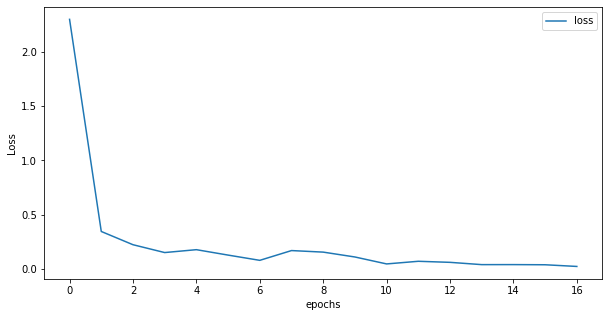

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

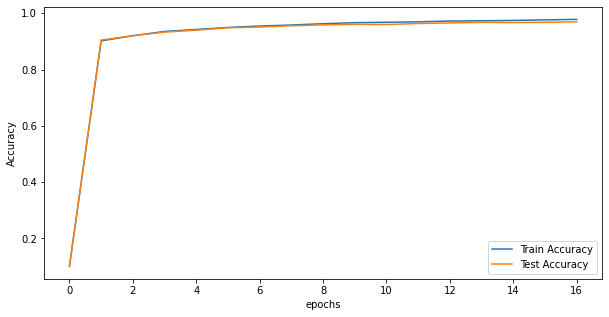

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label="Train Accuracy")
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label="Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# prediction

In [ ]:
pred_image = X_test[0]
pred_image.shape

(784,)

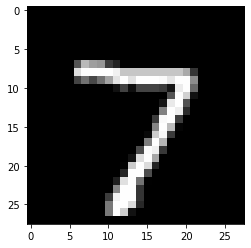

In [ ]:
image = pred_image.reshape(28, 28)

plt.imshow(image, 'gray')
plt.show()

In [ ]:
y_test[0]

7

In [ ]:
pred_result = network.predict(np.array([pred_image]))
pred_result

array([[  0.3333651 ,  -6.89750267,   4.74991766,   5.59340766,
         -6.89726963,  -1.91376061, -12.15154167,  13.14785823,
          1.93366497,   1.48850543]])

In [ ]:
np.argmax(pred_result, axis=1)

array([7])